In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtzan-musicspeech-collection/music_wav/winds.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/marlene.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/mingus1.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/classical2.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/unpoco.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/deedee1.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/gismonti.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/mingus.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/eguitar.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/russo.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/glass1.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/magkas.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/guitar.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/nearhou.wav
/kaggle/input/gtzan-musicspeech-collection/music_wav/pop.wav
/kaggle/input/gtzan-musicspeech-co

In [2]:
!pip install librosa

In [3]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [4]:
debussy_file = "/kaggle/input/gtzan-musicspeech-collection/music_wav/debussy.wav"

In [5]:
ipd.Audio(debussy_file)

In [6]:
debussy, sr = librosa.load(debussy_file)

Text(0.5, 1.0, 'Debusy')

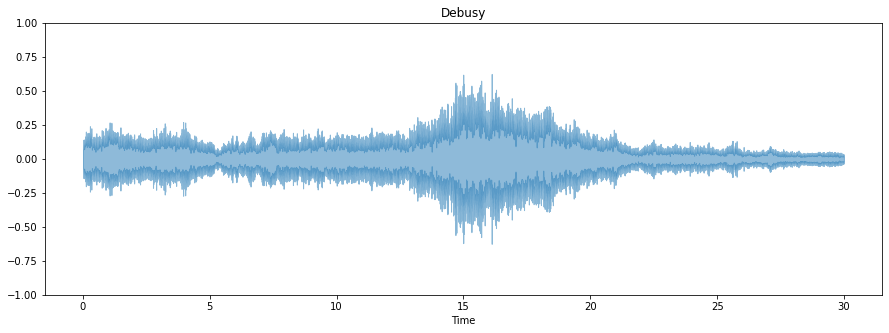

In [7]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Debusy")

In [8]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

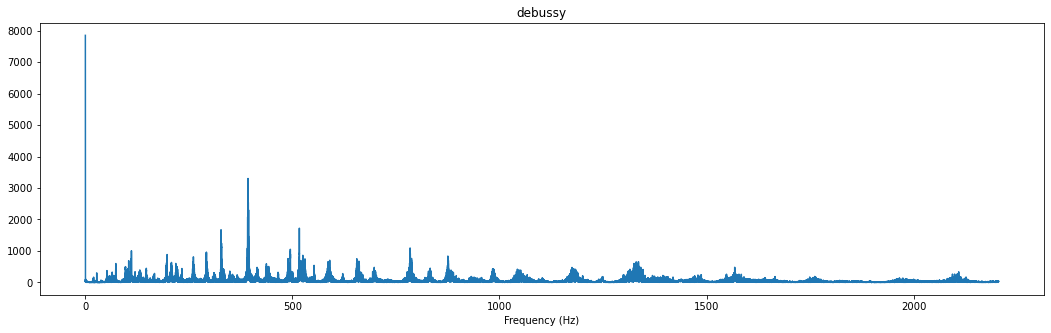

In [9]:
plot_magnitude_spectrum(debussy, sr, "debussy", 0.1)

In [10]:
FRAME_SIZE = 2048
HOP_SIZE = 512
S_scale = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_scale.shape

(1025, 1292)

In [11]:
Y_scale = np.abs(S_scale) ** 2
Y_scale.shape

(1025, 1292)

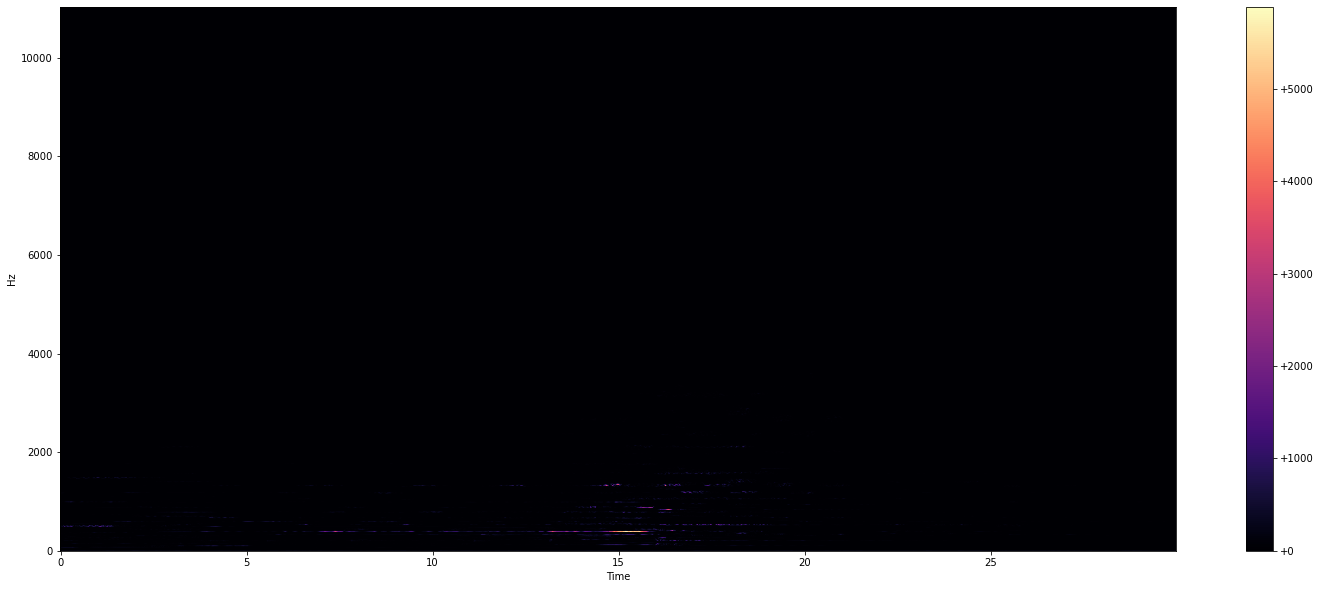

In [12]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")
plot_spectrogram(Y_scale, sr, HOP_SIZE)

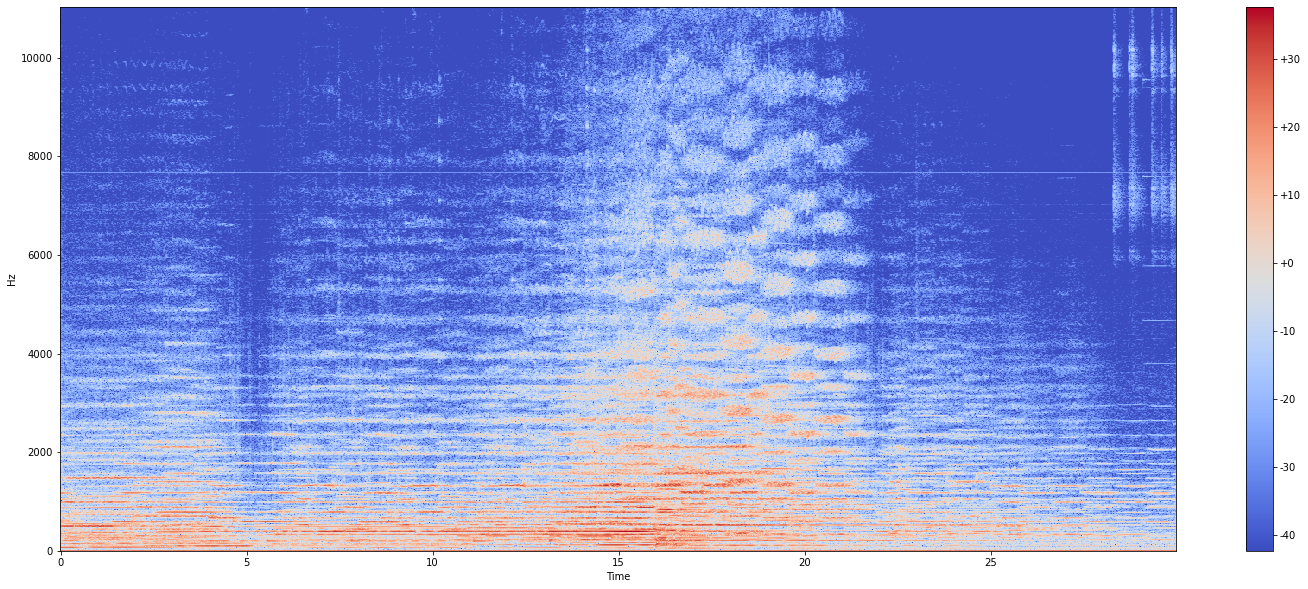

In [13]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

In [14]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
filter_banks.shape

(10, 1025)

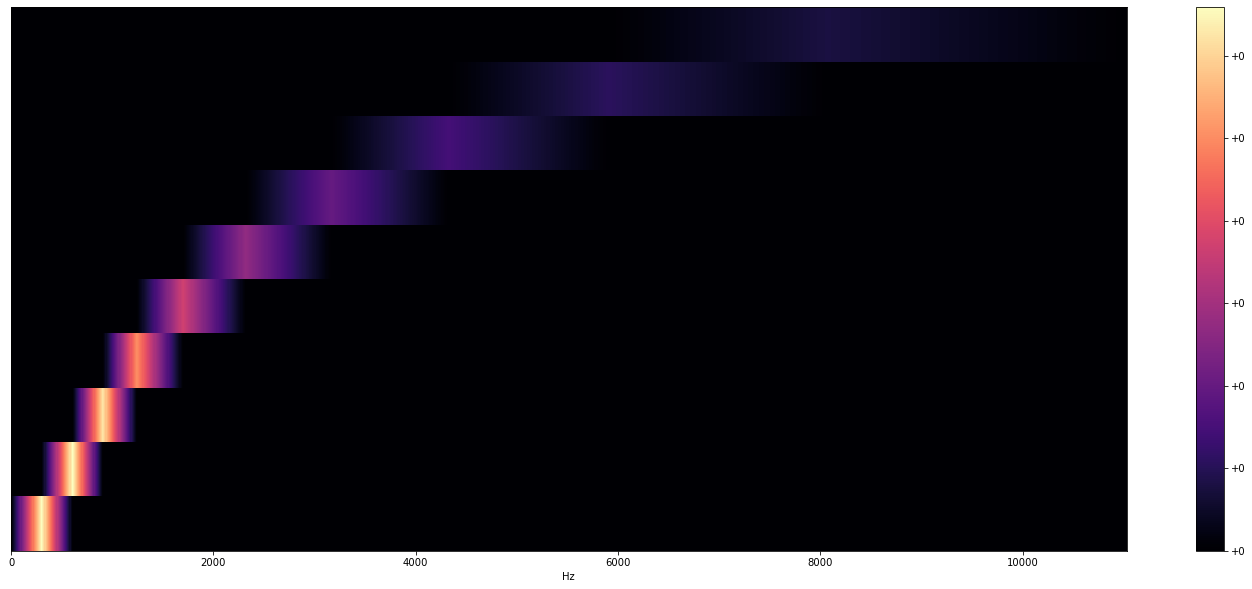

In [15]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()


In [16]:
mel_spectrogram = librosa.feature.melspectrogram(debussy, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
mel_spectrogram.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.01742554 -0.03567505 -0.04995728 ...  0.00912476  0.00866699
  0.00964355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


(10, 1292)

In [17]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

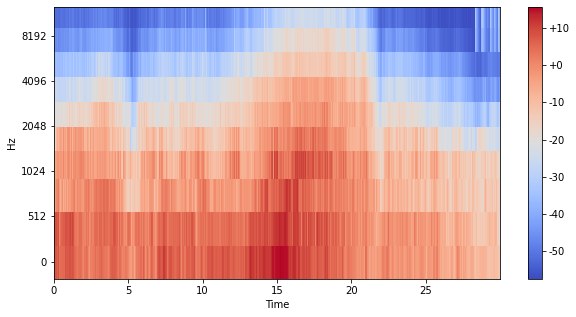

In [18]:
def mel_specto(log_mel):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(log_mel, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()
mel_specto(log_mel_spectrogram)

In [19]:
mfccs = librosa.feature.mfcc(y=debussy, n_mfcc=13, sr=sr)

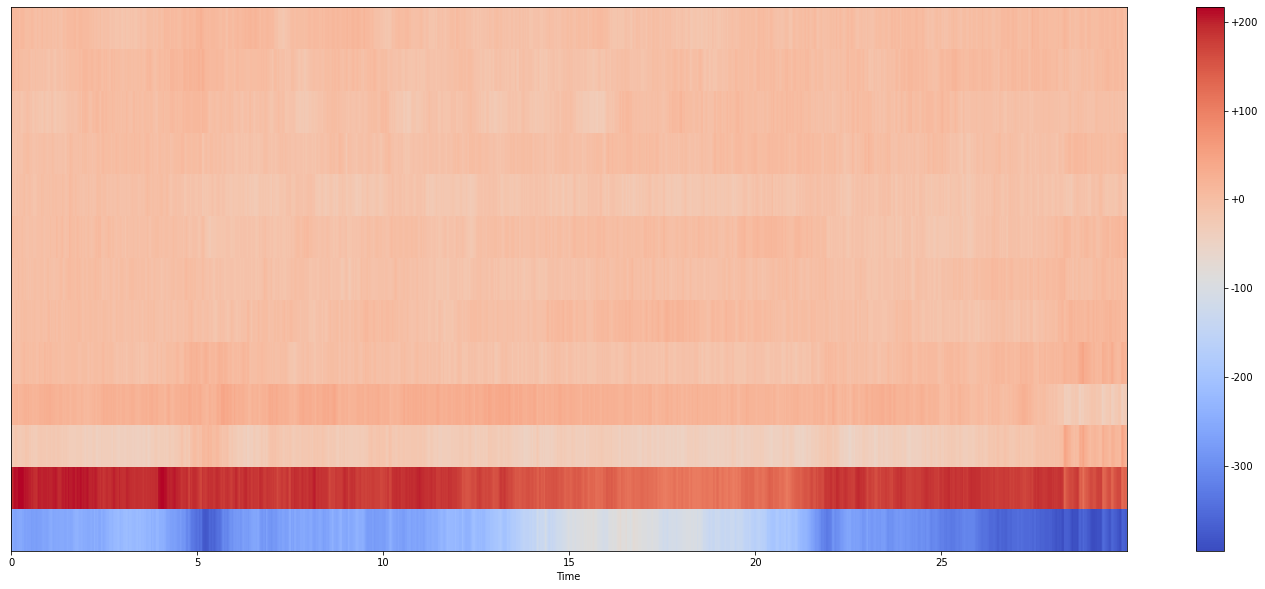

In [20]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

Male female


In [21]:
male_voice="/kaggle/input/voice/S_02_voice/S_02/multiple_sentences/S_02_4001_VE1.wav"
female_voice="/kaggle/input/voice/S_02_voice/S_02/multiple_sentences/S_02_4008_VE1.wav"

In [22]:
ipd.Audio(male_voice)


In [23]:
ipd.Audio(female_voice)

In [24]:
male, sr = librosa.load(male_voice)
female, sr = librosa.load(female_voice)

Text(0.5, 1.0, 'male')

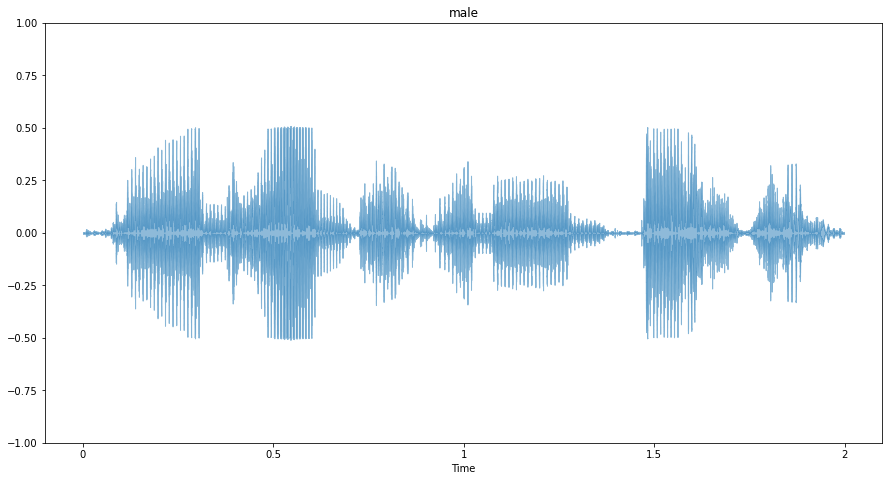

In [25]:
plt.figure(figsize=(15, 17))
plt.subplot(2, 1, 1)
librosa.display.waveshow(male, alpha=0.5)
plt.ylim((-1, 1))
plt.title("male")

Text(0.5, 1.0, 'female')

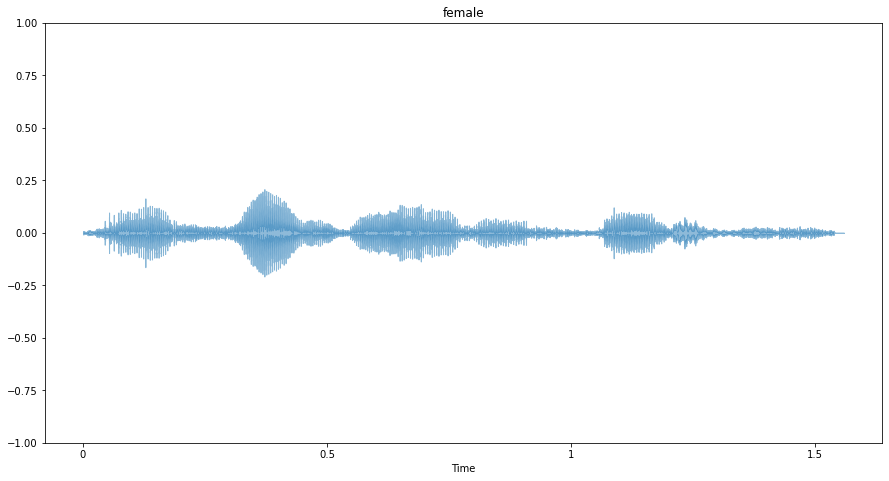

In [26]:
plt.figure(figsize=(15, 17))
plt.subplot(2, 1, 1)
librosa.display.waveshow(female, alpha=0.5)
plt.ylim((-1, 1))
plt.title("female")

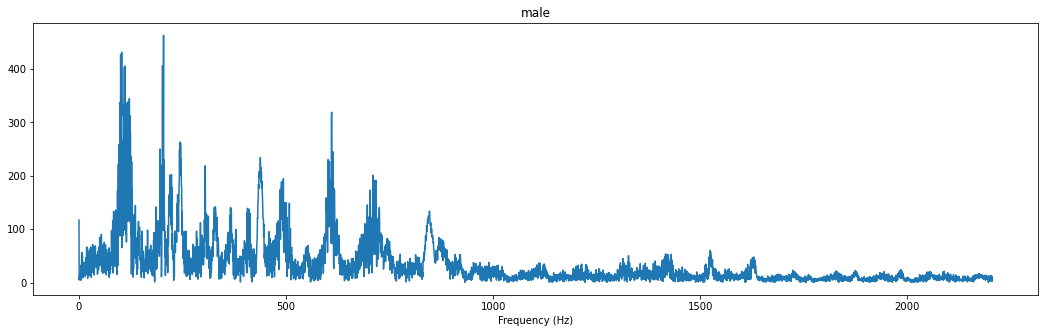

In [27]:
plot_magnitude_spectrum(male, sr, "male", 0.1)

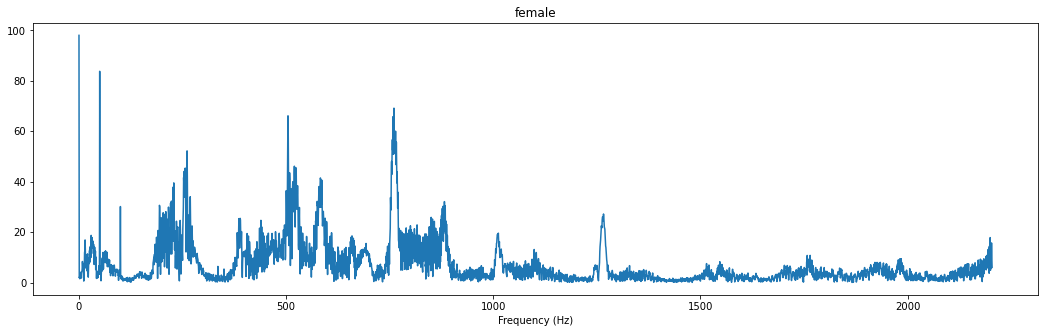

In [28]:
plot_magnitude_spectrum(female, sr, "female", 0.1)

In [29]:
mel_spectrogram_male = librosa.feature.melspectrogram(male, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
mel_spectrogram_female=librosa.feature.melspectrogram(female, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[0.00156631 0.00213035 0.00216038 ... 0.0042891  0.00206086 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.00244323 -0.00203765  0.00017387 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


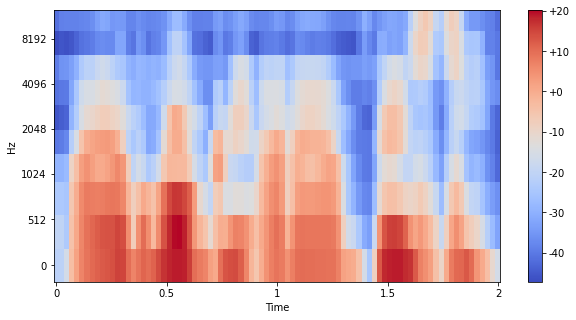

In [30]:
log_mel_spec_male=librosa.power_to_db(mel_spectrogram_male)
mel_specto(log_mel_spec_male)

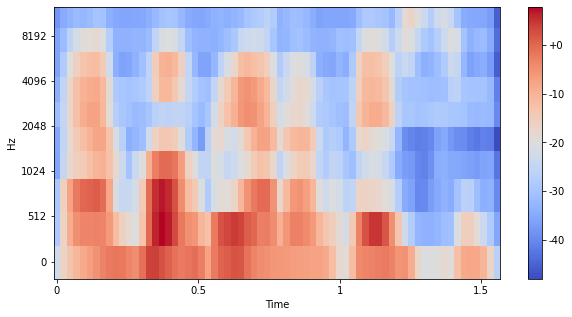

In [31]:
log_mel_spec_female=librosa.power_to_db(mel_spectrogram_female)
mel_specto(log_mel_spec_female)